In [139]:
import pandas as pd
import numpy as np
import scipy
import spacy
from collections import Counter
import unidecode
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
from nltk.corpus import stopwords
import nltk

In [5]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="ON/OFF code"></form>''')

In [60]:
# Importing teh dataset
df = pd.read_csv('../dataset/reuniao_ministerial.csv', dtype=str)

# Some transformations (strings to phrases and time to seconds)
df['time'] = df['time'].astype(str)
df['seconds'] = pd.TimedeltaIndex(df['time'].str.split(':').apply(lambda x: int(x[0])*60 + int(x[1])), unit='s')
df['text'] = df['text'].astype(str)

## Exploratory Data Analysis from Brazilian's Ministerial Meeting

***

    The focus of this work is to explore the transcribed audio from the recently announced video about one of brazilian's Ministerial Meeting that came to public within judicial order.

1. [Knowing Dataset](#1.-Knowing-dataset)
2. [Exploring Textual Data](#2.-Exploring-textual-data)


***

### 1. Knowing dataset
***

For first let's see how the dataset is organized with looking for:

* Types of variables;
* Some counts
* Total time of transcribed audio

***

* 5 first lines, types of columns, how many rows has null values and total od video time

In [95]:
display(df.head(5))
display(df.info())

print(f'''\nTotal time of trascribed audio: 
    {df.seconds.max().components.hours} hours and {df.seconds.max().components.minutes} minutes''')

,time,text,seconds
0,00:00,e aí,00:00:00
1,00:03,o som,00:00:03
2,00:20,g1,00:00:20
3,00:23,é porque nós vamos apresentar isso a,00:00:23
4,00:26,empresa aqui gente não foi apresentado,00:00:26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769 entries, 0 to 1768
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   time     1769 non-null   object         
 1   text     1769 non-null   object         
 2   seconds  1769 non-null   timedelta64[ns]
dtypes: object(2), timedelta64[ns](1)
memory usage: 41.6+ KB


None


Total time of trascribed audio: 
    1 hours and 54 minutes


***

### 2. Exploring textual data
***

For this point we'll see:

* Count of words (most/less freq.);
* Count of some POS tags like:

   - ADJ: adjective
   - ADV: adverb
   - PRON: pronoun
   - PROPN: proper noun
   - VERB: verb


***

In [144]:
#Let's use portuguese model in spyCy to transform our dataset

nlp = spacy.load('pt') #loading portuguese model
text = nlp(unidecode.unidecode(' '.join(df['text'].values))) # Transforming our dataset with spaCy model

stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [229]:
# Defining stopwords and add some custom words
custom_stop_words = ['entao', 'la', 'gente', 'vou', 'vamos', 'ah', 'ne', 'to', '[', ']', 'Musica', 'n', 
                     'vo', 'po', 'pro', 'dia', 'hoje']
custom_stop_words.extend([unidecode.unidecode(x) for x in stopwords.words('portuguese')])

# Help functions
def wordFreq(pos = None, words=10, custom_stopwords=True):
    for w in custom_stop_words:
        nlp.vocab[w].is_stop = True
    
    if pos != None:
        return Counter([token.text for token in text if (not token.is_stop) and 
              (token.pos_ in pos) and (not token.is_punct)]).most_common(words)
    else:
        return Counter([token.text for token in text if (not token.is_stop) and 
              (not token.is_punct)]).most_common(words)

* 10 most frequency **WORDS**: 

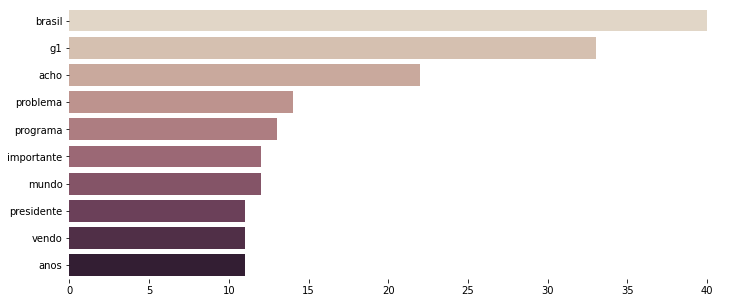

In [217]:
f, ax = plt.subplots(figsize=(12, 5))

common_words = wordFreq()

sn.barplot(x=1, y=0, data=pd.DataFrame(common_words), palette="ch:.25", ax=ax)
ax.set(xlabel='', ylabel='')
sn.despine(left=True, bottom=True)

* 10 most frequency **VERBS**: 

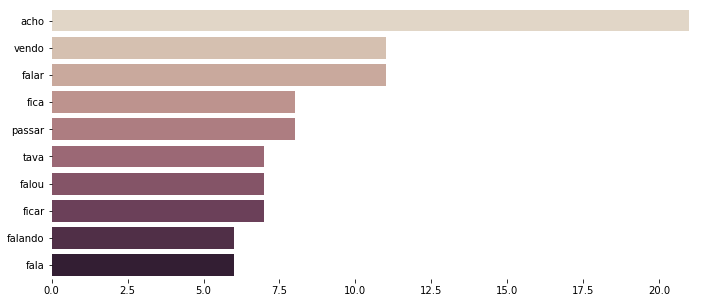

In [218]:
f, ax = plt.subplots(figsize=(12, 5))

common_words = wordFreq(pos=['VERB'])

sn.barplot(x=1, y=0, data=pd.DataFrame(common_words), palette="ch:.25", ax=ax)
ax.set(xlabel='', ylabel='')
sn.despine(left=True, bottom=True)

* 10 most frequency **ADJECTIVES**: 

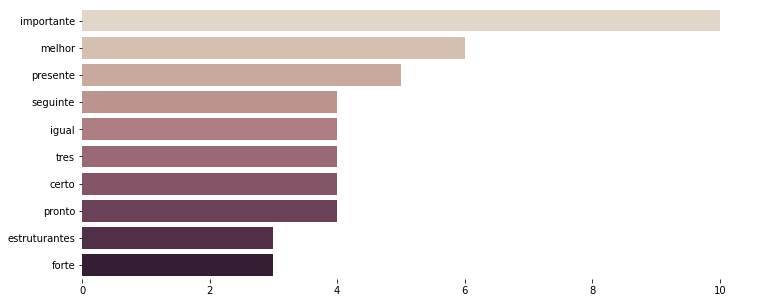

In [219]:
f, ax = plt.subplots(figsize=(12, 5))

common_words = wordFreq(pos=['ADJ'])

sn.barplot(x=1, y=0, data=pd.DataFrame(common_words), palette="ch:.25", ax=ax)
ax.set(xlabel='', ylabel='')
sn.despine(left=True, bottom=True)

* 10 most frequency **ADVERB**: 

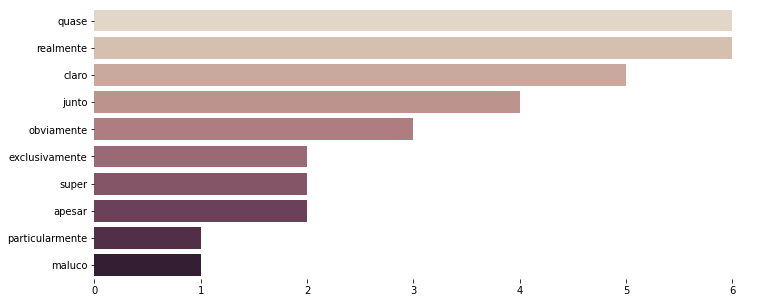

In [228]:
f, ax = plt.subplots(figsize=(12, 5))

common_words = wordFreq(pos=['ADV'])

sn.barplot(x=1, y=0, data=pd.DataFrame(common_words), palette="ch:.25", ax=ax)
ax.set(xlabel='', ylabel='')
sn.despine(left=True, bottom=True)

* 10 most frequency **NOUNS**: 

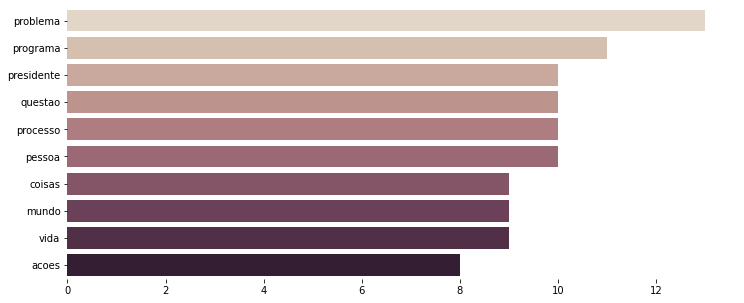

In [225]:
f, ax = plt.subplots(figsize=(12, 5))

common_words = wordFreq(pos=['NOUN'], words=10)

sn.barplot(x=1, y=0, data=pd.DataFrame(common_words), palette="ch:.25", ax=ax)
ax.set(xlabel='', ylabel='')
sn.despine(left=True, bottom=True)

* 10 most frequency **PRONOUNS**: 

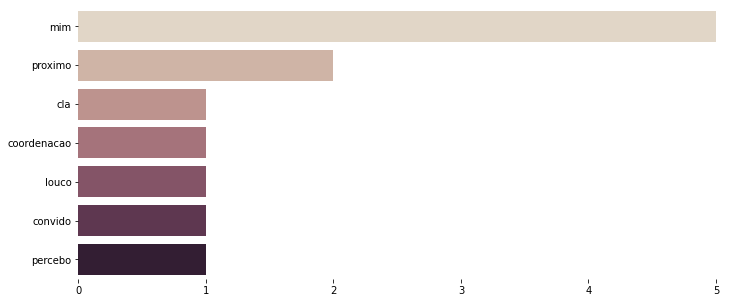

In [226]:
f, ax = plt.subplots(figsize=(12, 5))

common_words = wordFreq(pos=['PRON'], words=10)

sn.barplot(x=1, y=0, data=pd.DataFrame(common_words), palette="ch:.25", ax=ax)
ax.set(xlabel='', ylabel='')
sn.despine(left=True, bottom=True)

* 10 most frequency **PROPER NOUNS**: 

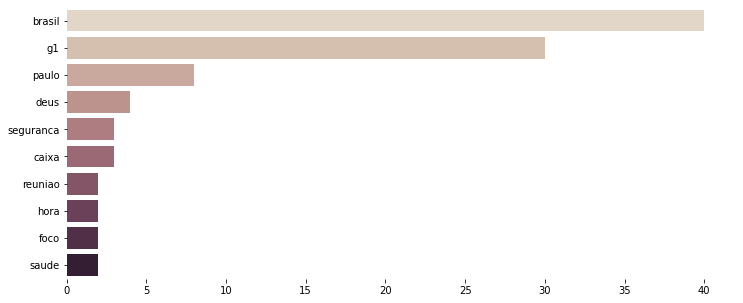

In [227]:
f, ax = plt.subplots(figsize=(12, 5))

common_words = wordFreq(pos=['PROPN'], words=10)

sn.barplot(x=1, y=0, data=pd.DataFrame(common_words), palette="ch:.25", ax=ax)
ax.set(xlabel='', ylabel='')
sn.despine(left=True, bottom=True)